<h1 style='color:purple' align='center'> Predicting Survival From Titanic Crash</h1>

# Objective : Titanic Crash  Survived Classification

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)

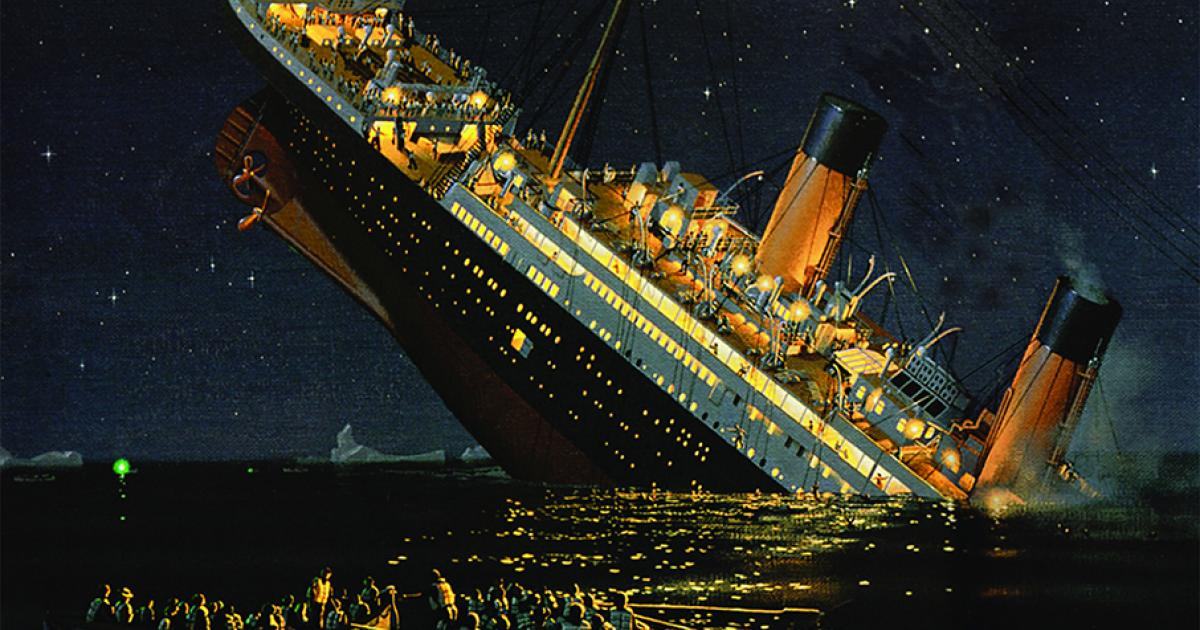

# 1. Load Python Modules

In [9]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve,auc, classification_report

# 2. Read the Dataset from CSV/Excel file  - Using Pandas

In [10]:
file_path=r"train.csv"
cvs=True
excel=False

if cvs:
    titanic_df = pd.read_csv(file_path)
elif excel:
    titanic_df = pd.read_excel(file_path)  
else:
    print("Filt Type is not specified")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Drop sensitive columns (id, name) and non-important columns for EDA and model development.
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Observations
1. Dropped the columns: 'PassengerId', 'Name', 'Ticket'

# 3. Basic Inspection on given dataset

In [12]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())

basic_inspection_dataset(titanic_df)

top 5 rows - using head
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

bottom 5 rows using tail
     Survived  Pclass     Sex   Age  SibSp  Parch   Fare Cabin Embarked
886         0       2    male  27.0      0      0  13.00   NaN        S
887         1       1  female  19.0      0      0  30.00   B42        S
888         0       3  female   NaN      1      2  23.45   NaN        S
889         1       1    male  26.0      0      0  30.00  C148        C
890         0       3    male  32.0      0      0   7.75   NaN        Q

numbers of samples and columns
(891, 9)

numbers of samples 
891

numbers of entries 

## Observations

1. Available columns: 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'. Target column: 'Survived'.
2. 'Age' and 'Fare' are numerical columns, while the rest are categorical.
3. 'Age' column contains 177 missing values.
4. 'Cabin' column has the highest number of missing values at 687, suggesting it can be dropped.
5. The dataset comprises 891 entries/observations/rows.



In [13]:
#drop 'Cabin' column - due to huge null/missisng  values 
titanic_df.drop(['Cabin'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# 4. Handling Missing Values - Cat - Variables

In [14]:
# checck Missing Values - 
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
## conver to cat - object data type
titanic_df["Pclass"]=titanic_df["Pclass"].astype("object")
titanic_df["Survived"]=titanic_df["Survived"].astype("object")
titanic_df["SibSp"]=titanic_df["SibSp"].astype("object")
titanic_df["Parch"]=titanic_df["Parch"].astype("object")


## Observations
1. Converting 'Pclass', 'SibSp', 'Survived', 'Parch' data type to categorical (object).


In [16]:
titanic_df.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp        object
Parch        object
Fare        float64
Embarked     object
dtype: object

In [17]:
titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0],inplace=True)

## observation
1. fill the missing values of Embarked with mode value

In [18]:
# check Missing Values 
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

# 5. Categorical- Variable - Analysis -Using Pipeline

In [19]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Survived frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    549    |
| 1 |   1   |    342    |
+---+-------+-----------+
Survived Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |   549.0   |        61.62         |
| 1 |  1.0  |   342.0   |        38.38         |
+---+-------+-----------+----------------------+


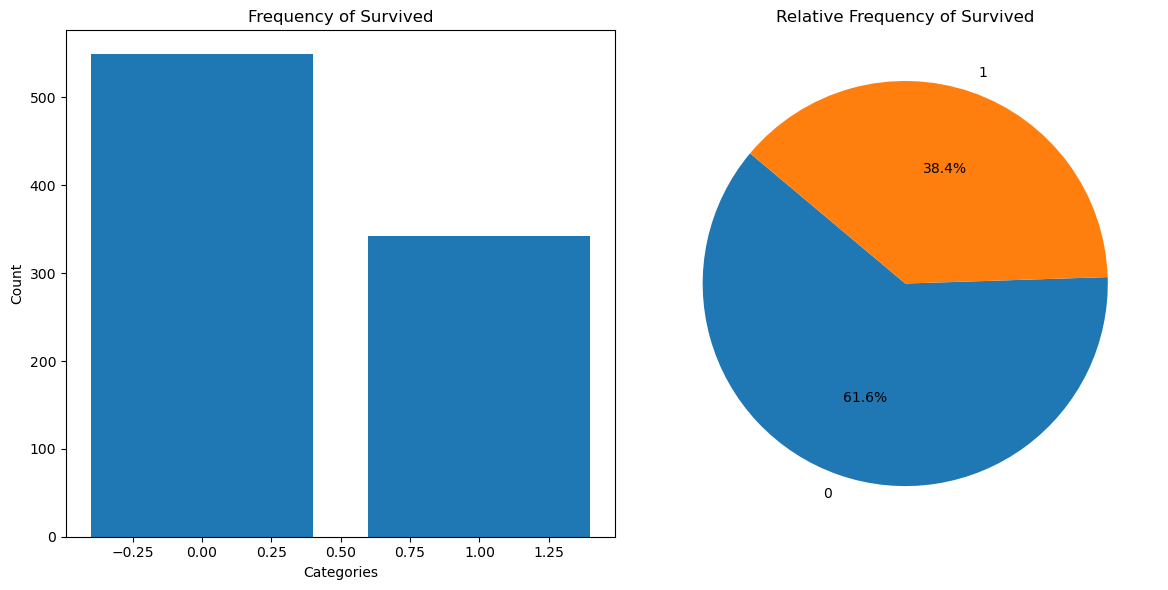

Pclass frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   3   |    491    |
| 1 |   1   |    216    |
| 2 |   2   |    184    |
+---+-------+-----------+
Pclass Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  3.0  |   491.0   |        55.11         |
| 1 |  1.0  |   216.0   |        24.24         |
| 2 |  2.0  |   184.0   |        20.65         |
+---+-------+-----------+----------------------+


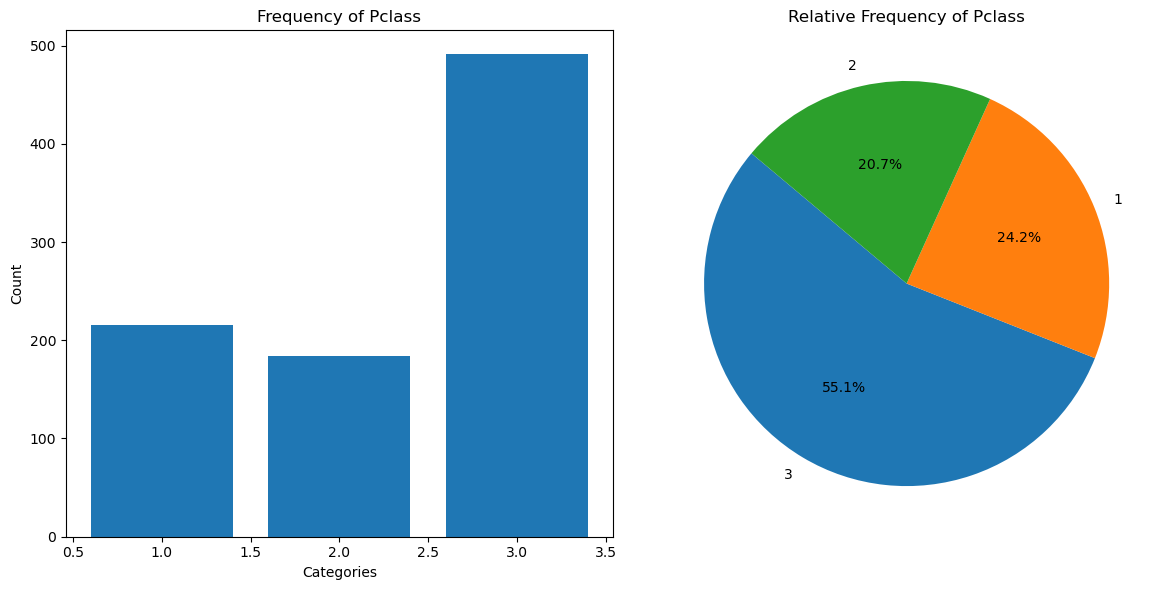

Sex frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 |  male  |    577    |
| 1 | female |    314    |
+---+--------+-----------+
Sex Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 |  male  |    577    |        64.76         |
| 1 | female |    314    |        35.24         |
+---+--------+-----------+----------------------+


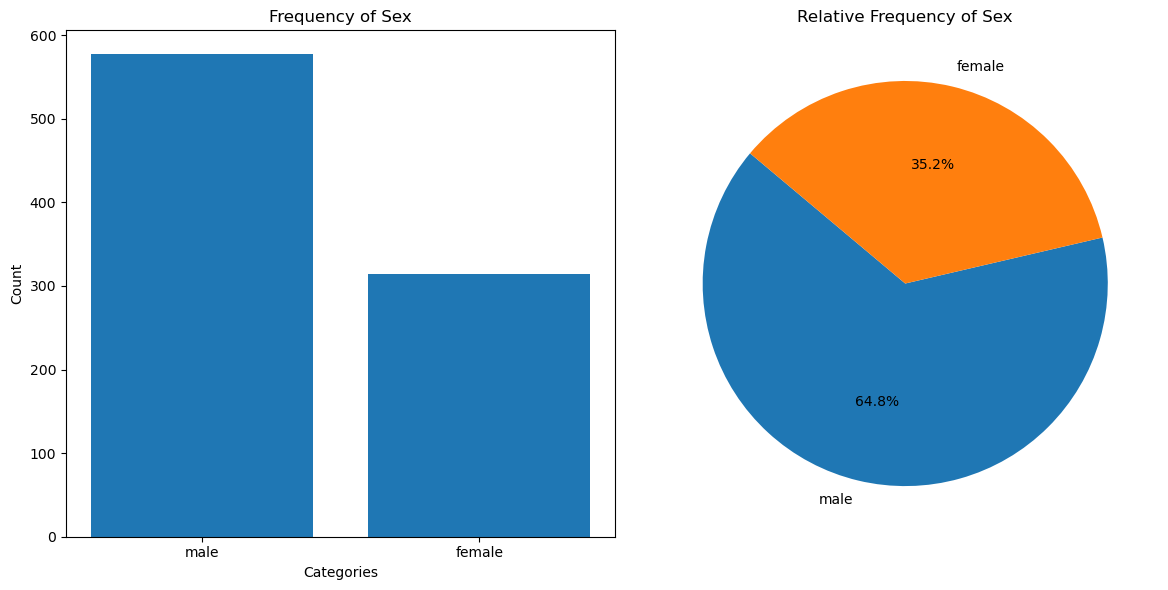

SibSp frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    608    |
| 1 |   1   |    209    |
| 2 |   2   |    28     |
| 3 |   4   |    18     |
| 4 |   3   |    16     |
| 5 |   8   |     7     |
| 6 |   5   |     5     |
+---+-------+-----------+
SibSp Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |   608.0   |        68.24         |
| 1 |  1.0  |   209.0   |        23.46         |
| 2 |  2.0  |   28.0    |         3.14         |
| 3 |  4.0  |   18.0    |         2.02         |
| 4 |  3.0  |   16.0    |         1.8          |
| 5 |  8.0  |    7.0    |         0.79         |
| 6 |  5.0  |    5.0    |         0.56         |
+---+-------+-----------+----------------------+


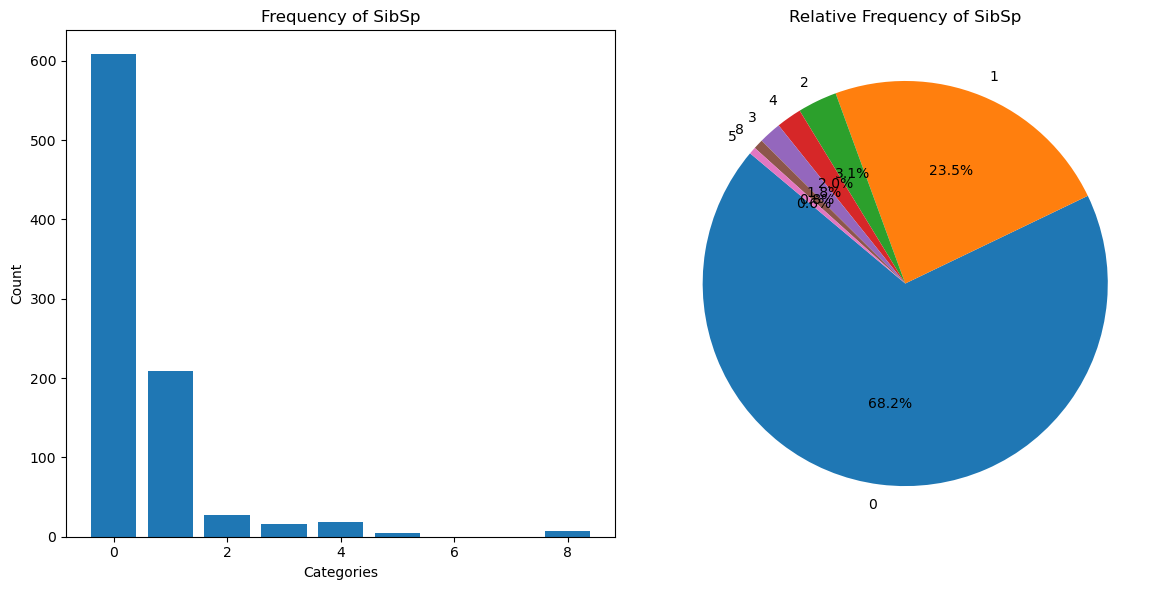

Parch frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    678    |
| 1 |   1   |    118    |
| 2 |   2   |    80     |
| 3 |   5   |     5     |
| 4 |   3   |     5     |
| 5 |   4   |     4     |
| 6 |   6   |     1     |
+---+-------+-----------+
Parch Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  0.0  |   678.0   |        76.09         |
| 1 |  1.0  |   118.0   |        13.24         |
| 2 |  2.0  |   80.0    |         8.98         |
| 3 |  5.0  |    5.0    |         0.56         |
| 4 |  3.0  |    5.0    |         0.56         |
| 5 |  4.0  |    4.0    |         0.45         |
| 6 |  6.0  |    1.0    |         0.11         |
+---+-------+-----------+----------------------+


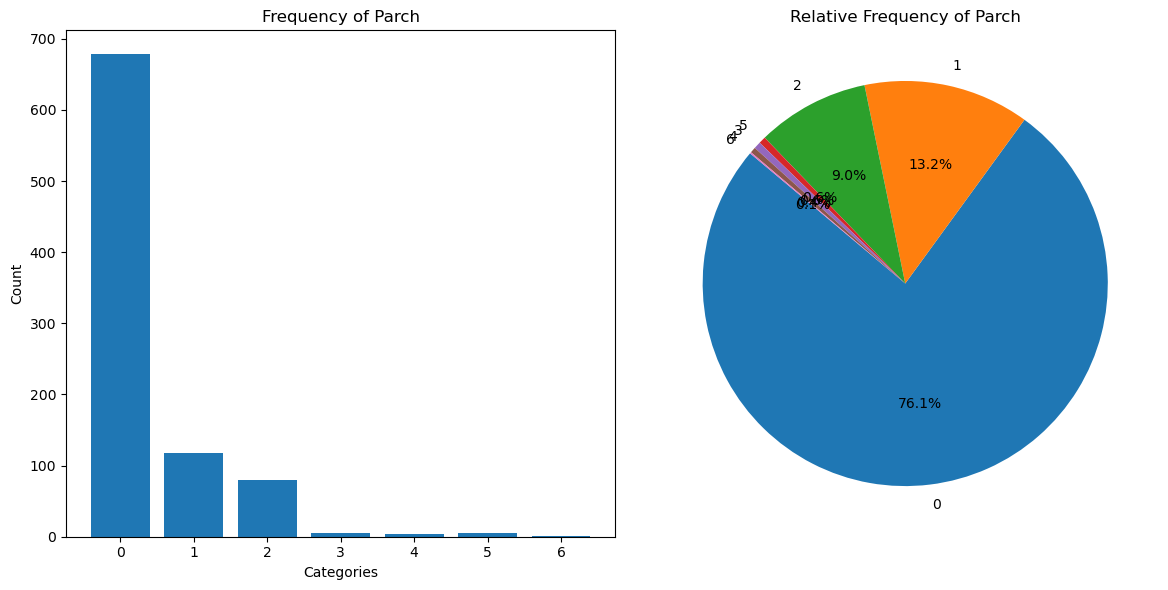

Embarked frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   S   |    646    |
| 1 |   C   |    168    |
| 2 |   Q   |    77     |
+---+-------+-----------+
Embarked Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   S   |    646    |         72.5         |
| 1 |   C   |    168    |        18.86         |
| 2 |   Q   |    77     |         8.64         |
+---+-------+-----------+----------------------+


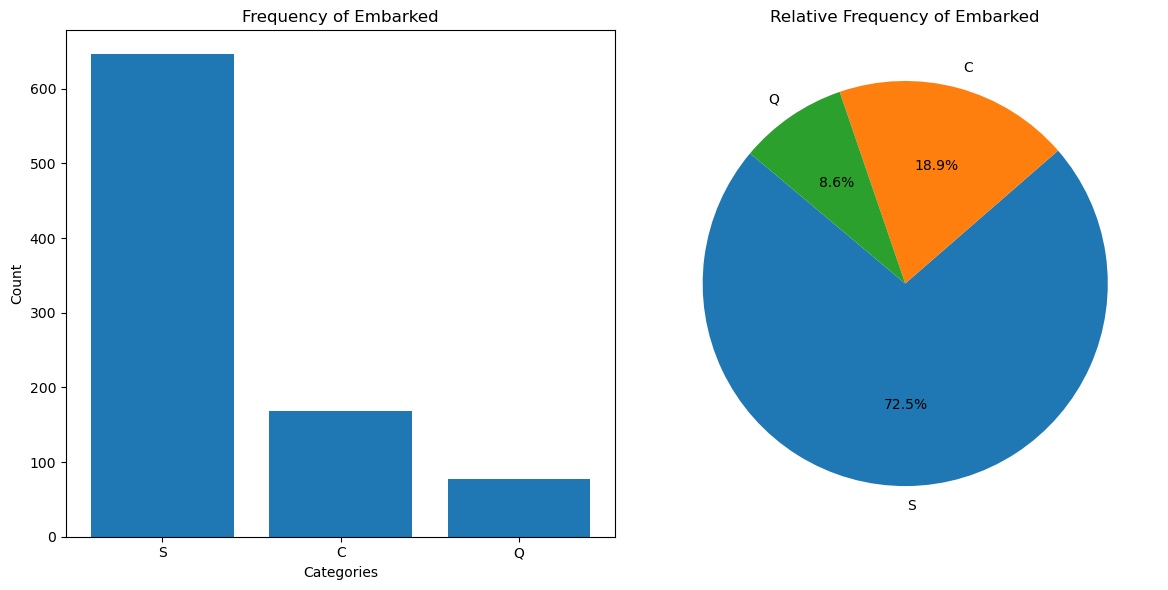

In [20]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(titanic_df)

## Observations

1. 'Embarked' has three categories.
2. 'Parch' has seven categories, with 0, 1, and 2 being the most repeated, while the rest are infrequent.
3. 'SibSp' has seven categories, with 0 and 1 being the most repeated, while the rest are infrequent.
4. 'Sex' has two categories, with 64% being Male and 35% being Female.
5. 'Pclass' has three categories: 1st, 2nd, and 3rd class.
6. 'Survived' has two categories, with 68% being dead and 32% survived.


# 6. Handling Missing Values in Numerical Columns

In [21]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [22]:
#filling with mean/median
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())
titanic_df.head()
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [23]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                        
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var],  color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()

        
        

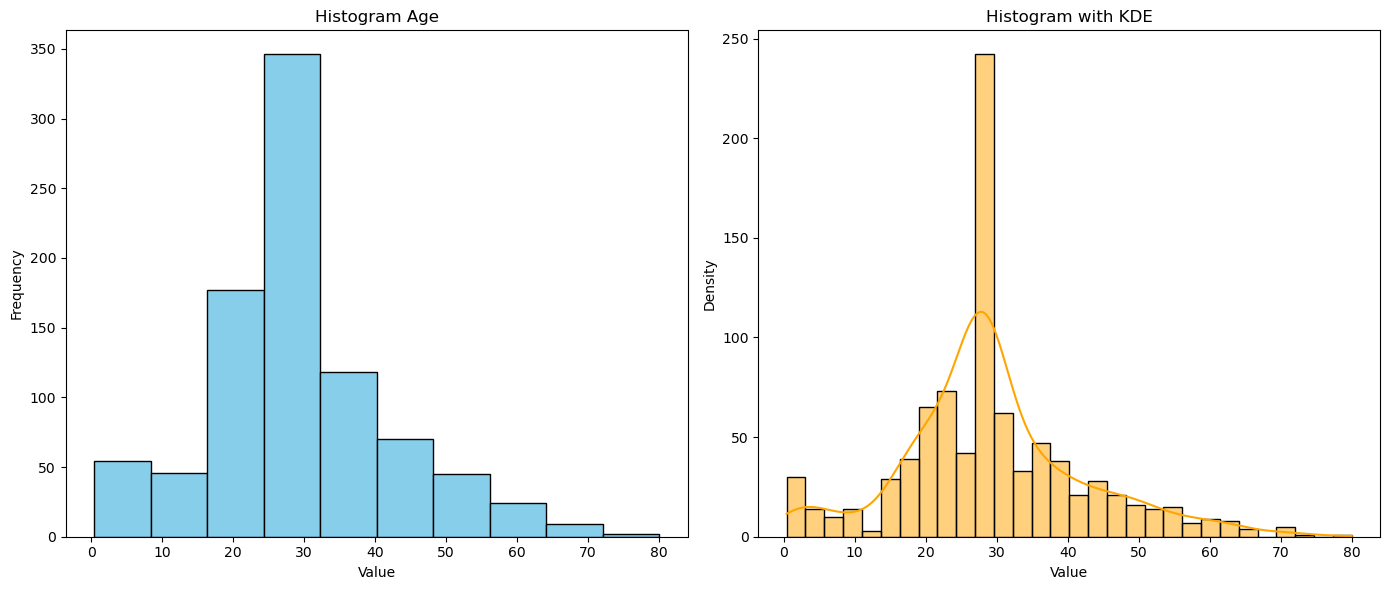

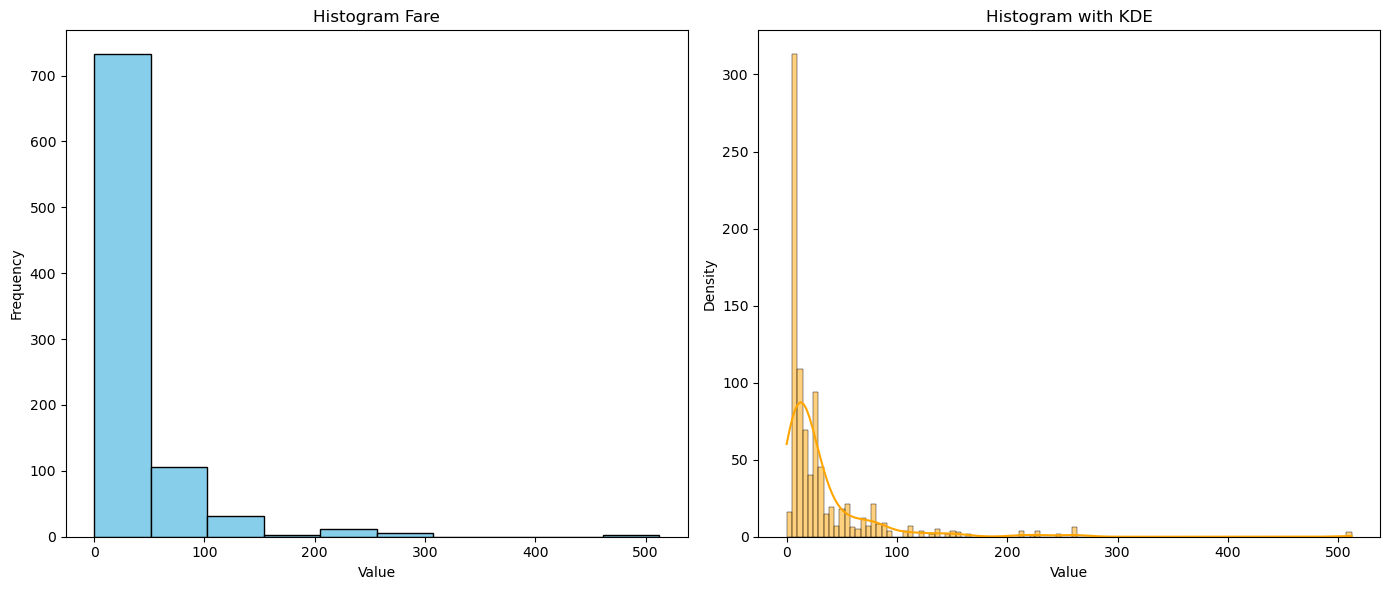

In [24]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(titanic_df)

## Observations
1. Age is normaly distributed (Bell Curve)
2. Fare is Right Skewed

# 8. Numerical - Variables -Outliers Analysis

In [25]:
titanic_df.select_dtypes(exclude="object").columns


Index(['Age', 'Fare'], dtype='object')

# 9. Bi Variate Analyis

In [26]:
cat_vars = titanic_df.select_dtypes(include="object").columns
cat_vars

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

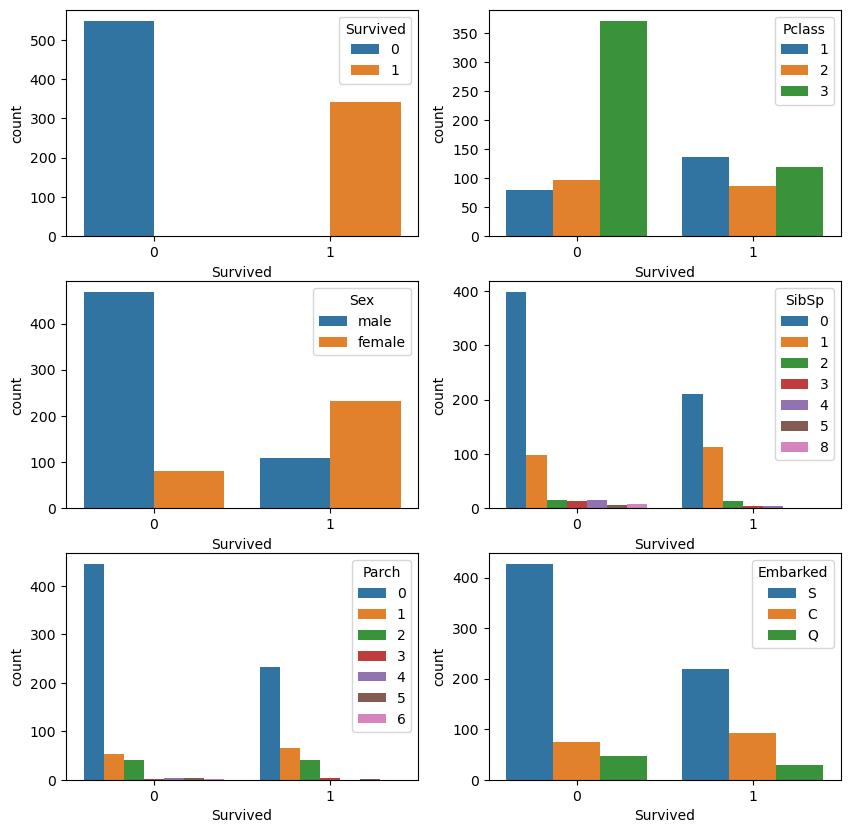

In [27]:
## Cat Vs Cat
output_var="Survived"
fig,ax = plt.subplots(3,2,figsize=(10,10))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=output_var,hue=x,ax=axi , data=titanic_df)

## Observations

1. In the 'Pclass' column, most Class 3 passengers are deceased.
2. In the 'Sex' column, the majority of males are deceased.
3. In the 'Sibsp' column, most individuals with zero siblings/spouses are deceased.
4. In the 'Parch' column, most individuals with zero parents/children aboard are deceased.
5. In the 'Embarked' column, individuals embarked at 'S' are mostly deceased.


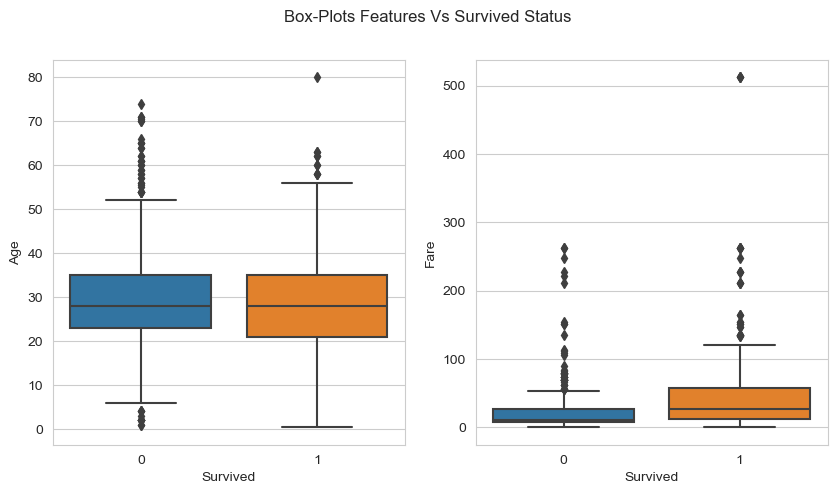

In [28]:
num_vars = ['Age', 'Fare']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Box-Plots Features Vs Survived Status')
sns.boxplot(ax=axes[0], x=output_var,y='Age', data=titanic_df)
sns.boxplot(ax=axes[1], x=output_var,y='Fare', data=titanic_df)
plt.show()

## Observations

1. Passengers with low fares are deceased, while those with high fares survived.
2. Children, indicated by lower ages, have a higher survival rate.


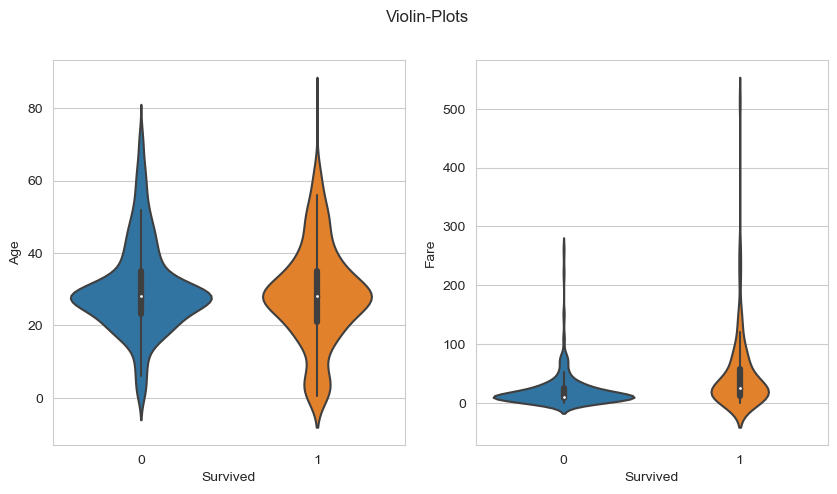

In [29]:
num_vars = ['Age', 'Fare']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0], x=output_var,y='Age', data=titanic_df)
sns.violinplot(ax=axes[1], x=output_var,y='Fare', data=titanic_df)
plt.show()

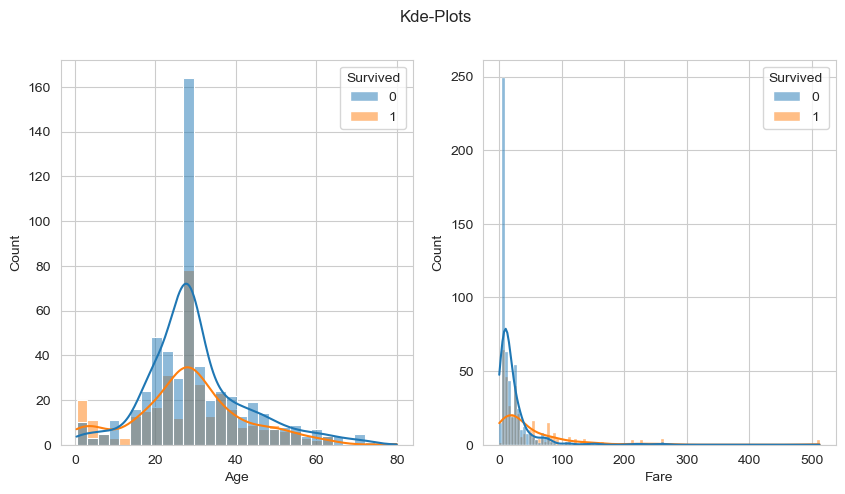

In [30]:
num_vars = ['Age', 'Fare']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0], hue=output_var,x='Age', data=titanic_df,kde=True)
sns.histplot(ax=axes[1], hue=output_var,x='Fare', data=titanic_df,kde=True)
plt.show()

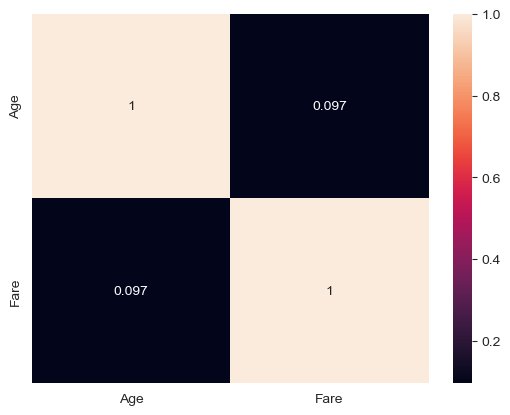

In [31]:
corr_mat=titanic_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

# 10. Data Transformation

In [32]:
titanic_df["Age_log"]=np.log1p(titanic_df["Age"])
titanic_df["Fare_log"]=np.log1p(titanic_df["Fare"])

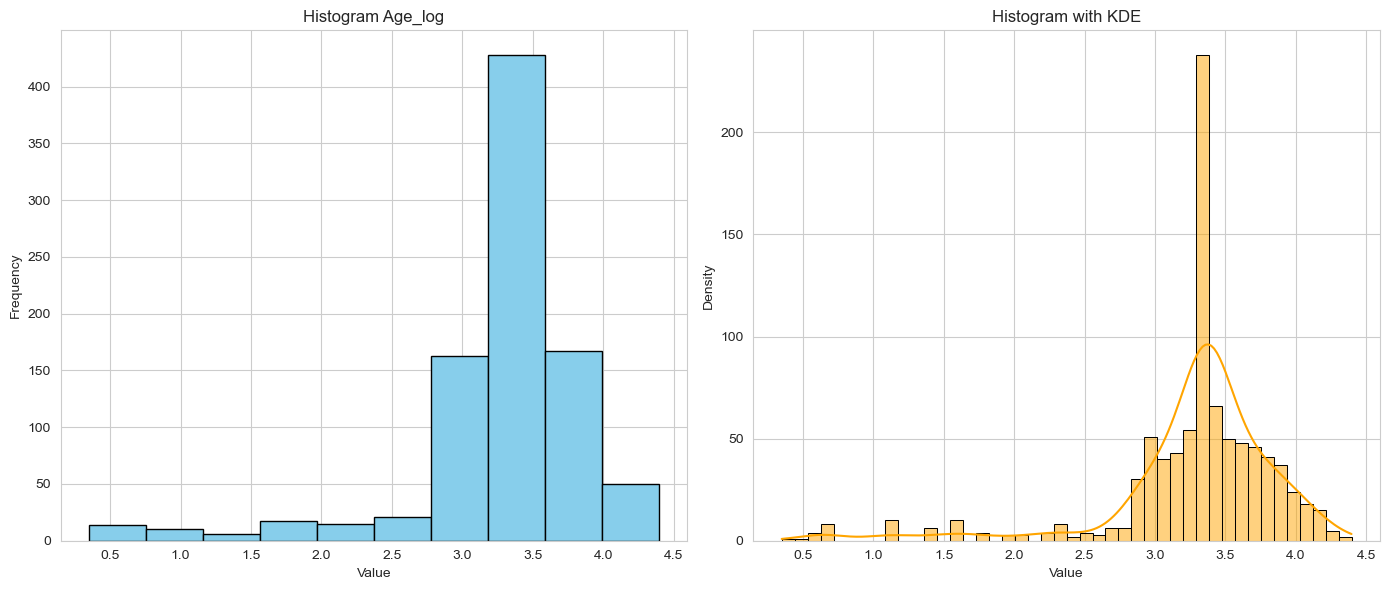

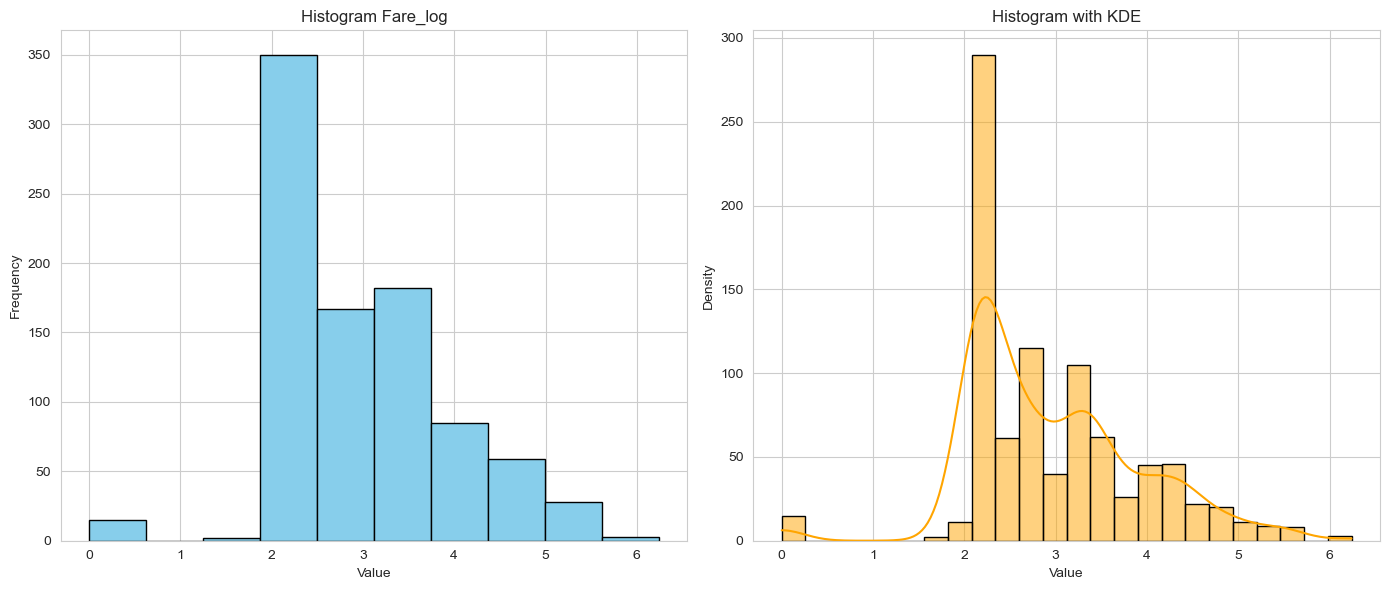

In [33]:
titanic_num_df = titanic_df[['Age_log','Fare_log']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(titanic_num_df)

In [34]:
titanic_df["Age_sqrt"]=np.sqrt(titanic_df["Age"])
titanic_df["Fare_sqrt"]=np.sqrt(titanic_df["Fare"])

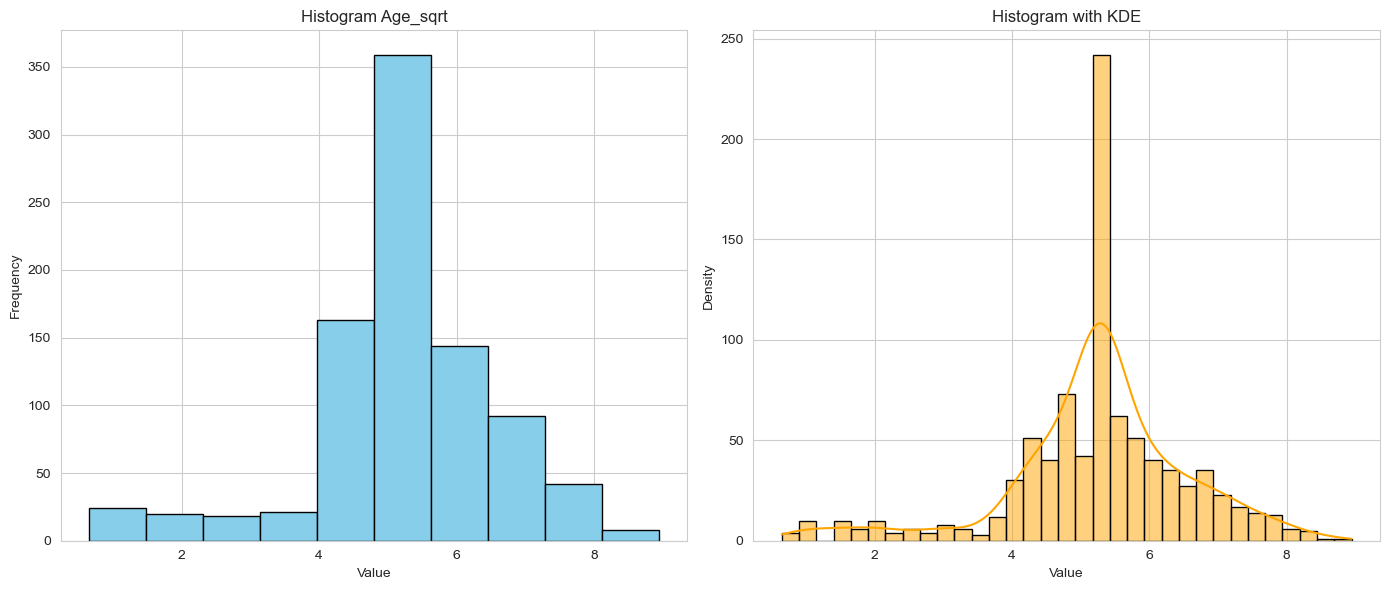

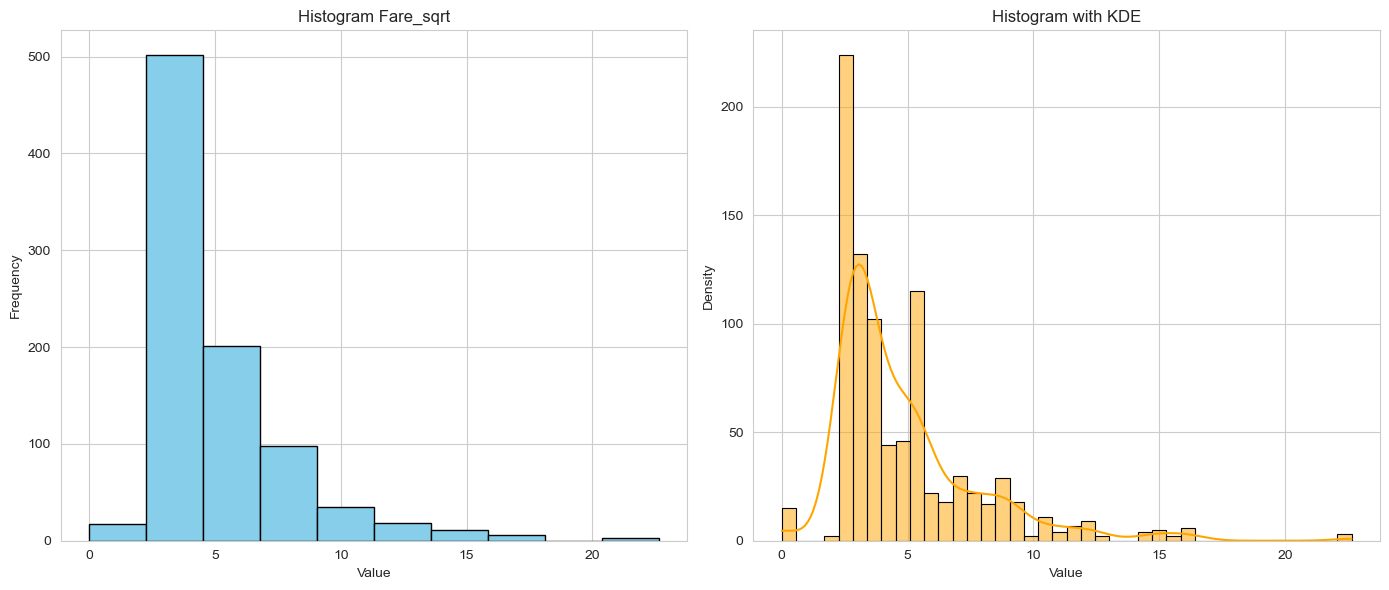

In [35]:
titanic_num_df = titanic_df[['Age_sqrt','Fare_sqrt']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(titanic_num_df)

## Observations
1. Did the data transfromation - to bring into normal gausian distribution

# 11. Standization - Normalization

In [36]:
scaler = StandardScaler()

# Fit and transform the scaler on the selected column
scaled_column = scaler.fit_transform(titanic_df[['Age_sqrt','Fare_sqrt']])

# Replace the original column with the scaled column
titanic_df[['Age_sqrt_stand','Fare_sqrt_stand']] = scaled_column
print(titanic_df)

    Survived Pclass     Sex   Age SibSp Parch     Fare Embarked   Age_log  \
0          0      3    male  22.0     1     0   7.2500        S  3.135494   
1          1      1  female  38.0     1     0  71.2833        C  3.663562   
2          1      3  female  26.0     0     0   7.9250        S  3.295837   
3          1      1  female  35.0     1     0  53.1000        S  3.583519   
4          0      3    male  35.0     0     0   8.0500        S  3.583519   
..       ...    ...     ...   ...   ...   ...      ...      ...       ...   
886        0      2    male  27.0     0     0  13.0000        S  3.332205   
887        1      1  female  19.0     0     0  30.0000        S  2.995732   
888        0      3  female  28.0     1     2  23.4500        S  3.367296   
889        1      1    male  26.0     0     0  30.0000        C  3.295837   
890        0      3    male  32.0     0     0   7.7500        Q  3.496508   

     Fare_log  Age_sqrt  Fare_sqrt  Age_sqrt_stand  Fare_sqrt_stand  
0    

## Observation
1. We have done the standization on Numberical columns

# 12. Convert Cat - to - Numerical Columns

In [37]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_log', 'Fare_log', 'Age_sqrt', 'Fare_sqrt',
       'Age_sqrt_stand', 'Fare_sqrt_stand'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Embarked']:
    titanic_df[var]=le.fit_transform(titanic_df[var])

In [39]:
titanic_df[output_var].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# 13. SMOTE for Balancing Data

In [40]:
Y=titanic_df["Survived"]
X=titanic_df[[ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_sqrt_stand', 'Fare_sqrt_stand']]
print(X.columns)
print(len(Y),len(X))

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_sqrt_stand',
       'Fare_sqrt_stand'],
      dtype='object')
891 891


In [41]:
X, Y = SMOTE().fit_resample(X, Y)
print(X.columns)
print(len(Y),len(X))

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_sqrt_stand',
       'Fare_sqrt_stand'],
      dtype='object')
1098 1098


In [42]:
Y.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

## Observations
1. Balancing the dataset using SMOTE

# 14. ML Models

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [44]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [45]:
def metric_calssifcation(y_test, y_pred ,model):
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    

    print("Model",model)
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
  

    cmt = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=[False, True])
    disp.plot()
    plt.grid(False)
    plt.show()

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Negative:", tn)
    print("False Positive:", fp)
    print("False Negative:", fn)
    print("True Positive:", tp)
    print("\n\n")

## 14.1 Logistic Regression 

Model - Logistic Regression
accuracy train score overall : 0.7961275626423691
accuracy test score overall : 0.8227272727272728
Model Logistic Regression
Accuracy: 82.27
F1 Score: 0.84
Precision: 0.8
Recall: 0.88


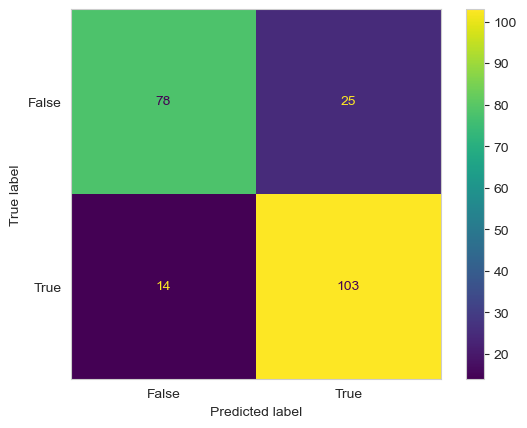

True Negative: 78
False Positive: 25
False Negative: 14
True Positive: 103





In [46]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
metric_calssifcation(y_test,y_pred,"Logistic Regression")

## 14.2 GaussianNB

Model-GaussianNB
train score 0.7722095671981777
test score 0.8181818181818182
Model GaussianNB
Accuracy: 82.27
F1 Score: 0.84
Precision: 0.8
Recall: 0.88


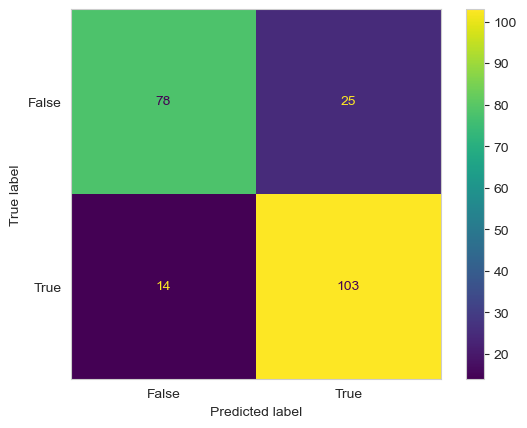

True Negative: 78
False Positive: 25
False Negative: 14
True Positive: 103





In [47]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)

print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,y_train))
print("test score",gnb_model.score(X_test,y_test))

y_pred = gnb_model.predict(X_test)
y_pred = lg_model.predict(X_test)
metric_calssifcation(y_test,y_pred,"GaussianNB")

## 14.3 Suport Vector Machine - Classifier

model-Suport Vector Machine - kernel - linear -Classifier
Train Accuracy: 0.7813211845102506
Model svm-linear
Accuracy: 84.55
F1 Score: 0.85
Precision: 0.88
Recall: 0.82


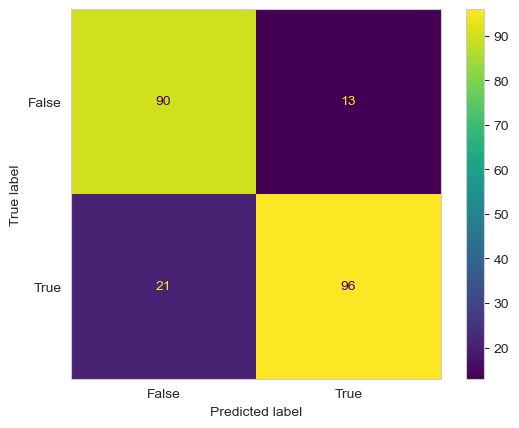

True Negative: 90
False Positive: 13
False Negative: 21
True Positive: 96





In [48]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_linear_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_linear_classifier.fit(X_train, y_train)
print("model-Suport Vector Machine - kernel - linear -Classifier")

y_pred = svm_linear_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_linear_classifier.predict(X_test)
metric_calssifcation(y_test,y_pred,"svm-linear")

model-Suport Vector Machine - Kernel -rbf - Classifier
Train Accuracy: 0.826879271070615
Model svm-rbf
Accuracy: 84.09
F1 Score: 0.86
Precision: 0.83
Recall: 0.89


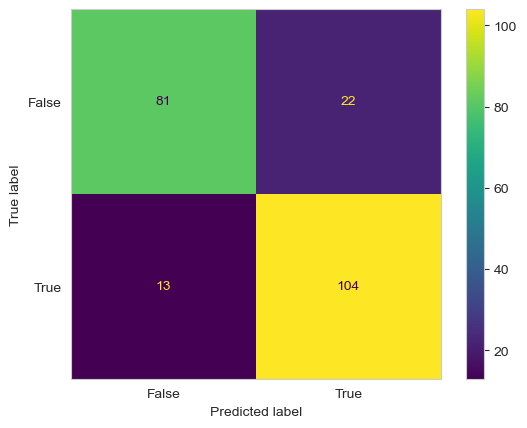

True Negative: 81
False Positive: 22
False Negative: 13
True Positive: 104





In [49]:
svm_rbf_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_rbf_classifier.fit(X_train, y_train)
print("model-Suport Vector Machine - Kernel -rbf - Classifier")
y_pred = svm_rbf_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_rbf_classifier.predict(X_test)
# Calculate the accuracy of the model
metric_calssifcation(y_test,y_pred,"svm-rbf")

model-Suport Vector Machine - Kernel -poly - Classifier
Train Accuracy: 0.8109339407744874
Model svm-poly
Accuracy: 82.73
F1 Score: 0.84
Precision: 0.81
Recall: 0.88


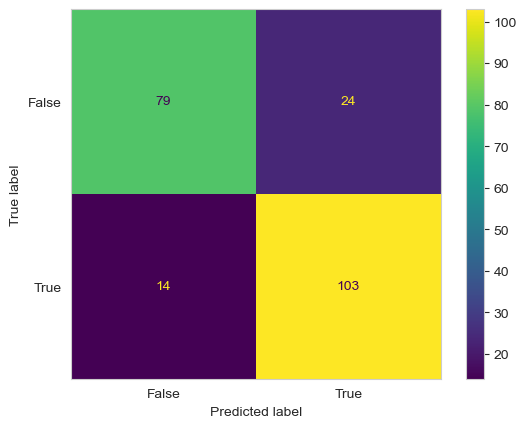

True Negative: 79
False Positive: 24
False Negative: 14
True Positive: 103





In [50]:
svm_poly_classifier = SVC(kernel='poly', random_state=42)

# Train the SVM classifier
svm_poly_classifier.fit(X_train, y_train)
print("model-Suport Vector Machine - Kernel -poly - Classifier")

y_pred = svm_poly_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_poly_classifier.predict(X_test)

metric_calssifcation(y_test,y_pred,"svm-poly")

## 14.4 Decision Tree

Model-Decion Tree
train score: 0.8519362186788155
test score: 0.8272727272727273
Model DT
Accuracy: 82.73
F1 Score: 0.83
Precision: 0.87
Recall: 0.79


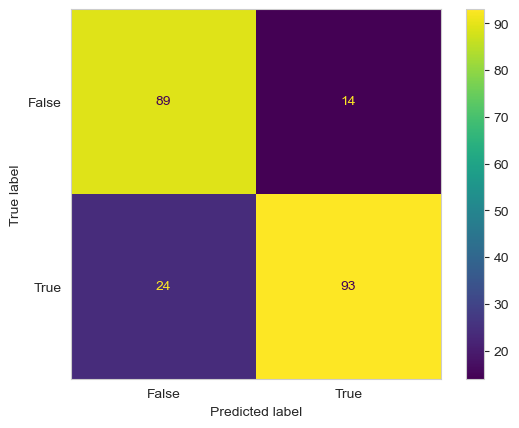

True Negative: 89
False Positive: 14
False Negative: 24
True Positive: 93





In [51]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, y_test)
print(f"test score: {accuracy}")

y_pred=dt_clf.predict(X_test)
metric_calssifcation(y_test,y_pred,"DT")

## 14.5 Random Forest

Model- Random Forest Tree
train score: 0.8587699316628702
test score: 0.85
Model RF
Accuracy: 85.0
F1 Score: 0.86
Precision: 0.84
Recall: 0.89


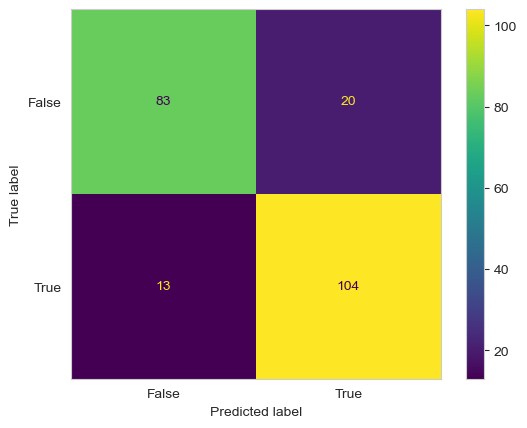

True Negative: 83
False Positive: 20
False Negative: 13
True Positive: 104





In [52]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
metric_calssifcation(y_test,y_pred,"RF")

## 14.6 AdaBoost 

Model-AdaBoost
train score 0.8280182232346242
test score: 0.8363636363636363
Model Ada
Accuracy: 83.64
F1 Score: 0.85
Precision: 0.82
Recall: 0.88


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


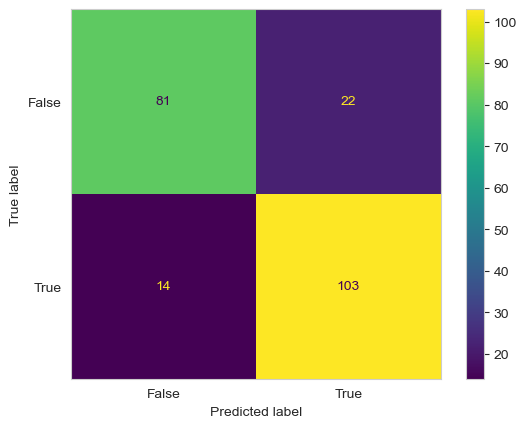

True Negative: 81
False Positive: 22
False Negative: 14
True Positive: 103





In [53]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"test score: {accuracy}")

metric_calssifcation(y_test,y_pred,"Ada")

## 14.7 GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 0.7596810933940774
Test Accuracy: 0.8136363636363636
Model GBoost
Accuracy: 81.36
F1 Score: 0.81
Precision: 0.87
Recall: 0.76


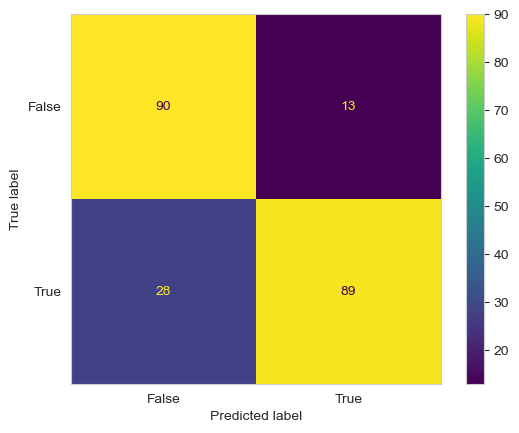

True Negative: 90
False Positive: 13
False Negative: 28
True Positive: 89





In [54]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, y_test)
print("Test Accuracy:", accuracy)

y_pred=gdb_clf.predict(X_test)
metric_calssifcation(y_test,y_pred,"GBoost")

## 14.8 XGBClassifier

model- XGB Classifier
Train Accuracy: 0.9760820045558086
Test Accuracy: 0.8409090909090909
Model XGB
Accuracy: 84.09
F1 Score: 0.85
Precision: 0.87
Recall: 0.83


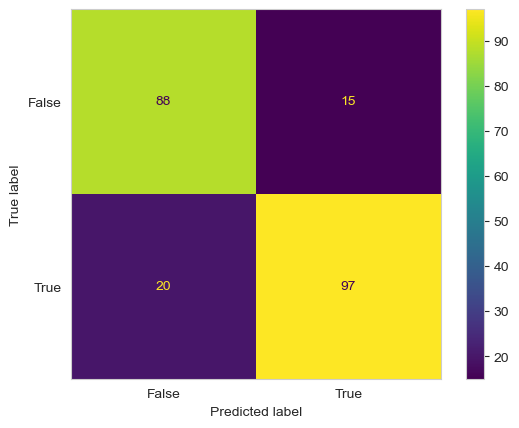

True Negative: 88
False Positive: 15
False Negative: 20
True Positive: 97





In [55]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

metric_calssifcation(y_test,y_pred,"XGB")

# 15. Hyper Parameter

In [56]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'DT': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 20, 30, 40, 50],
            'random_state': [0, 42],
            'max_features': ['auto', 'sqrt', 'log2']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,200,400,500],
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 20, 30, 40, 50],
            'random_state': [0,42]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto',random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver':['liblinear', 'saga'],
            'penalty': ['l1', 'l2'],
            'max_iter': [500, 700, 900]

        }
    }
}

In [57]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,scoring='accuracy')
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91956\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91956\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\91956\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\91956\anaconda3\Lib\site-packag

,model,best_score,best_params
0,DT,0.805279,"{'criterion': 'gini', 'max_depth': 20, 'max_fe..."
1,random_forest,0.835987,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
2,logistic_regression,0.793792,"{'C': 0.1, 'max_iter': 500, 'penalty': 'l2', '..."


In [58]:
df["best_params"][1]

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 500,
 'random_state': 0}

Model- Random Forest Tree
train score: 0.9373576309794989
test score: 0.8454545454545455
Model RF-Final
Accuracy: 84.55
F1 Score: 0.85
Precision: 0.89
Recall: 0.81


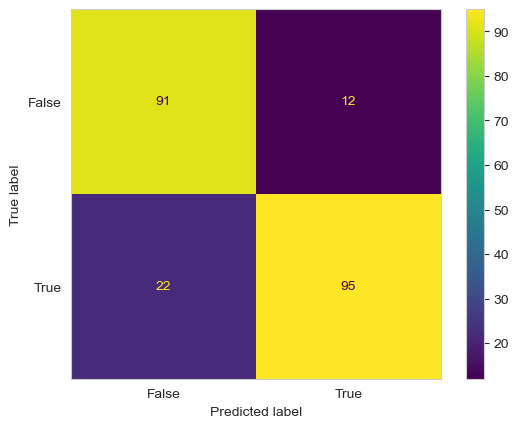

True Negative: 91
False Positive: 12
False Negative: 22
True Positive: 95





In [59]:
rf_clf= RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,random_state=0)
rf_clf.fit(X_train, y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
metric_calssifcation(y_test,y_pred,"RF-Final")

# 16. Test - Submit

In [60]:
file_path=r"test.csv"
titanic_test_df = pd.read_csv(file_path)
titanic_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
#drop - sensitive - non imp columns
titanic_test_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_test_df.drop(['Cabin'],axis=1,inplace=True)
titanic_test_df["Pclass"]=titanic_test_df["Pclass"].astype("object")
titanic_test_df["SibSp"]=titanic_test_df["SibSp"].astype("object")
titanic_test_df["Parch"]=titanic_test_df["Parch"].astype("object")

In [62]:
titanic_test_df["Embarked"].fillna(titanic_test_df["Embarked"].mode()[0],inplace=True)
titanic_test_df["Age"] = titanic_test_df["Age"].fillna(titanic_test_df["Age"].median())

In [63]:
titanic_test_df["Age_sqrt"]=np.sqrt(titanic_test_df["Age"])
titanic_test_df["Fare_sqrt"]=np.sqrt(titanic_test_df["Fare"])

In [64]:
# Fit and transform the scaler on the selected column
scaled_column = scaler.fit_transform(titanic_test_df[['Age_sqrt','Fare_sqrt']])

# Replace the original column with the scaled column
titanic_test_df[['Age_sqrt_stand','Fare_sqrt_stand']] = scaled_column
print(titanic_test_df)

    Pclass     Sex   Age SibSp Parch      Fare Embarked  Age_sqrt  Fare_sqrt  \
0        3    male  34.5     0     0    7.8292        Q  5.873670   2.798071   
1        3  female  47.0     1     0    7.0000        S  6.855655   2.645751   
2        2    male  62.0     0     0    9.6875        Q  7.874008   3.112475   
3        3    male  27.0     0     0    8.6625        S  5.196152   2.943213   
4        3  female  22.0     1     1   12.2875        S  4.690416   3.505353   
..     ...     ...   ...   ...   ...       ...      ...       ...        ...   
413      3    male  27.0     0     0    8.0500        S  5.196152   2.837252   
414      1  female  39.0     0     0  108.9000        C  6.244998  10.435516   
415      3    male  38.5     0     0    7.2500        S  6.204837   2.692582   
416      3    male  27.0     0     0    8.0500        S  5.196152   2.837252   
417      3    male  27.0     1     1   22.3583        C  5.196152   4.728456   

     Age_sqrt_stand  Fare_sqrt_stand  


In [65]:
le = LabelEncoder()
for var in ['Pclass', 'Sex',  'SibSp', 'Parch','Embarked']:
    titanic_test_df[var]=le.fit_transform(titanic_test_df[var])

In [66]:
test_df = titanic_test_df[[ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_sqrt_stand', 'Fare_sqrt_stand']].copy()

In [67]:
test_pred = rf_clf.predict(test_df)
file_path = r"gender_submission.csv"
output_df = pd.read_csv(file_path)
output_df["Survived"]=test_pred
output_df[["PassengerId","Survived"]].to_csv("titanic-survived-prediction-output-rf.csv",index=False)

# Conlusion

Covered the following in the exercise
1. Data Exploration
2. Data Preprocessing
3. Model Building
4. Model Evaluation
5. Model Tuning
6. Documentation